In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 75.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

#df = pd.read_csv("/content/example.csv", index_col=[0],low_memory=False)



In [ ]:
df.columns

Index(['ip', 'org', 'hostname', 'latitude', 'longitude', 'picture'], dtype='object')

In [ ]:
df.head

<bound method NDFrame.head of                   ip  org  hostname  latitude  longitude  \
0    124.251.100.130  NaN       NaN   34.7732    113.722   
1    124.251.100.130  NaN       NaN   34.7732    113.722   
2    124.251.100.130  NaN       NaN   34.7732    113.722   
3    124.251.100.130  NaN       NaN   34.7732    113.722   
4    124.251.100.130  NaN       NaN   34.7732    113.722   
..               ...  ...       ...       ...        ...   
136     5.75.230.242  NaN       NaN   51.2993      9.491   
137     5.75.230.242  NaN       NaN   51.2993      9.491   
138     5.75.230.242  NaN       NaN   51.2993      9.491   
139     5.75.230.242  NaN       NaN   51.2993      9.491   
140     5.75.230.242  NaN       NaN   51.2993      9.491   

                       picture  
0                 ledvance.jpg  
1                 ledvance.jpg  
2                 ledvance.jpg  
3                 ledvance.jpg  
4                 ledvance.jpg  
..                         ...  
136  mystrom_motio

In [ ]:
new_df=df[['ip','latitude','longitude']]

In [ ]:
gdf

,ip,latitude,longitude,geometry
0,124.251.100.130,34.7732,113.722,POINT (113.72200 34.77320)
1,124.251.100.130,34.7732,113.722,POINT (113.72200 34.77320)
2,124.251.100.130,34.7732,113.722,POINT (113.72200 34.77320)
3,124.251.100.130,34.7732,113.722,POINT (113.72200 34.77320)
4,124.251.100.130,34.7732,113.722,POINT (113.72200 34.77320)
...,...,...,...,...
136,5.75.230.242,51.2993,9.491,POINT (9.49100 51.29930)
137,5.75.230.242,51.2993,9.491,POINT (9.49100 51.29930)
138,5.75.230.242,51.2993,9.491,POINT (9.49100 51.29930)
139,5.75.230.242,51.2993,9.491,POINT (9.49100 51.29930)


In [ ]:
gdf.iterrows():

<Axes: >

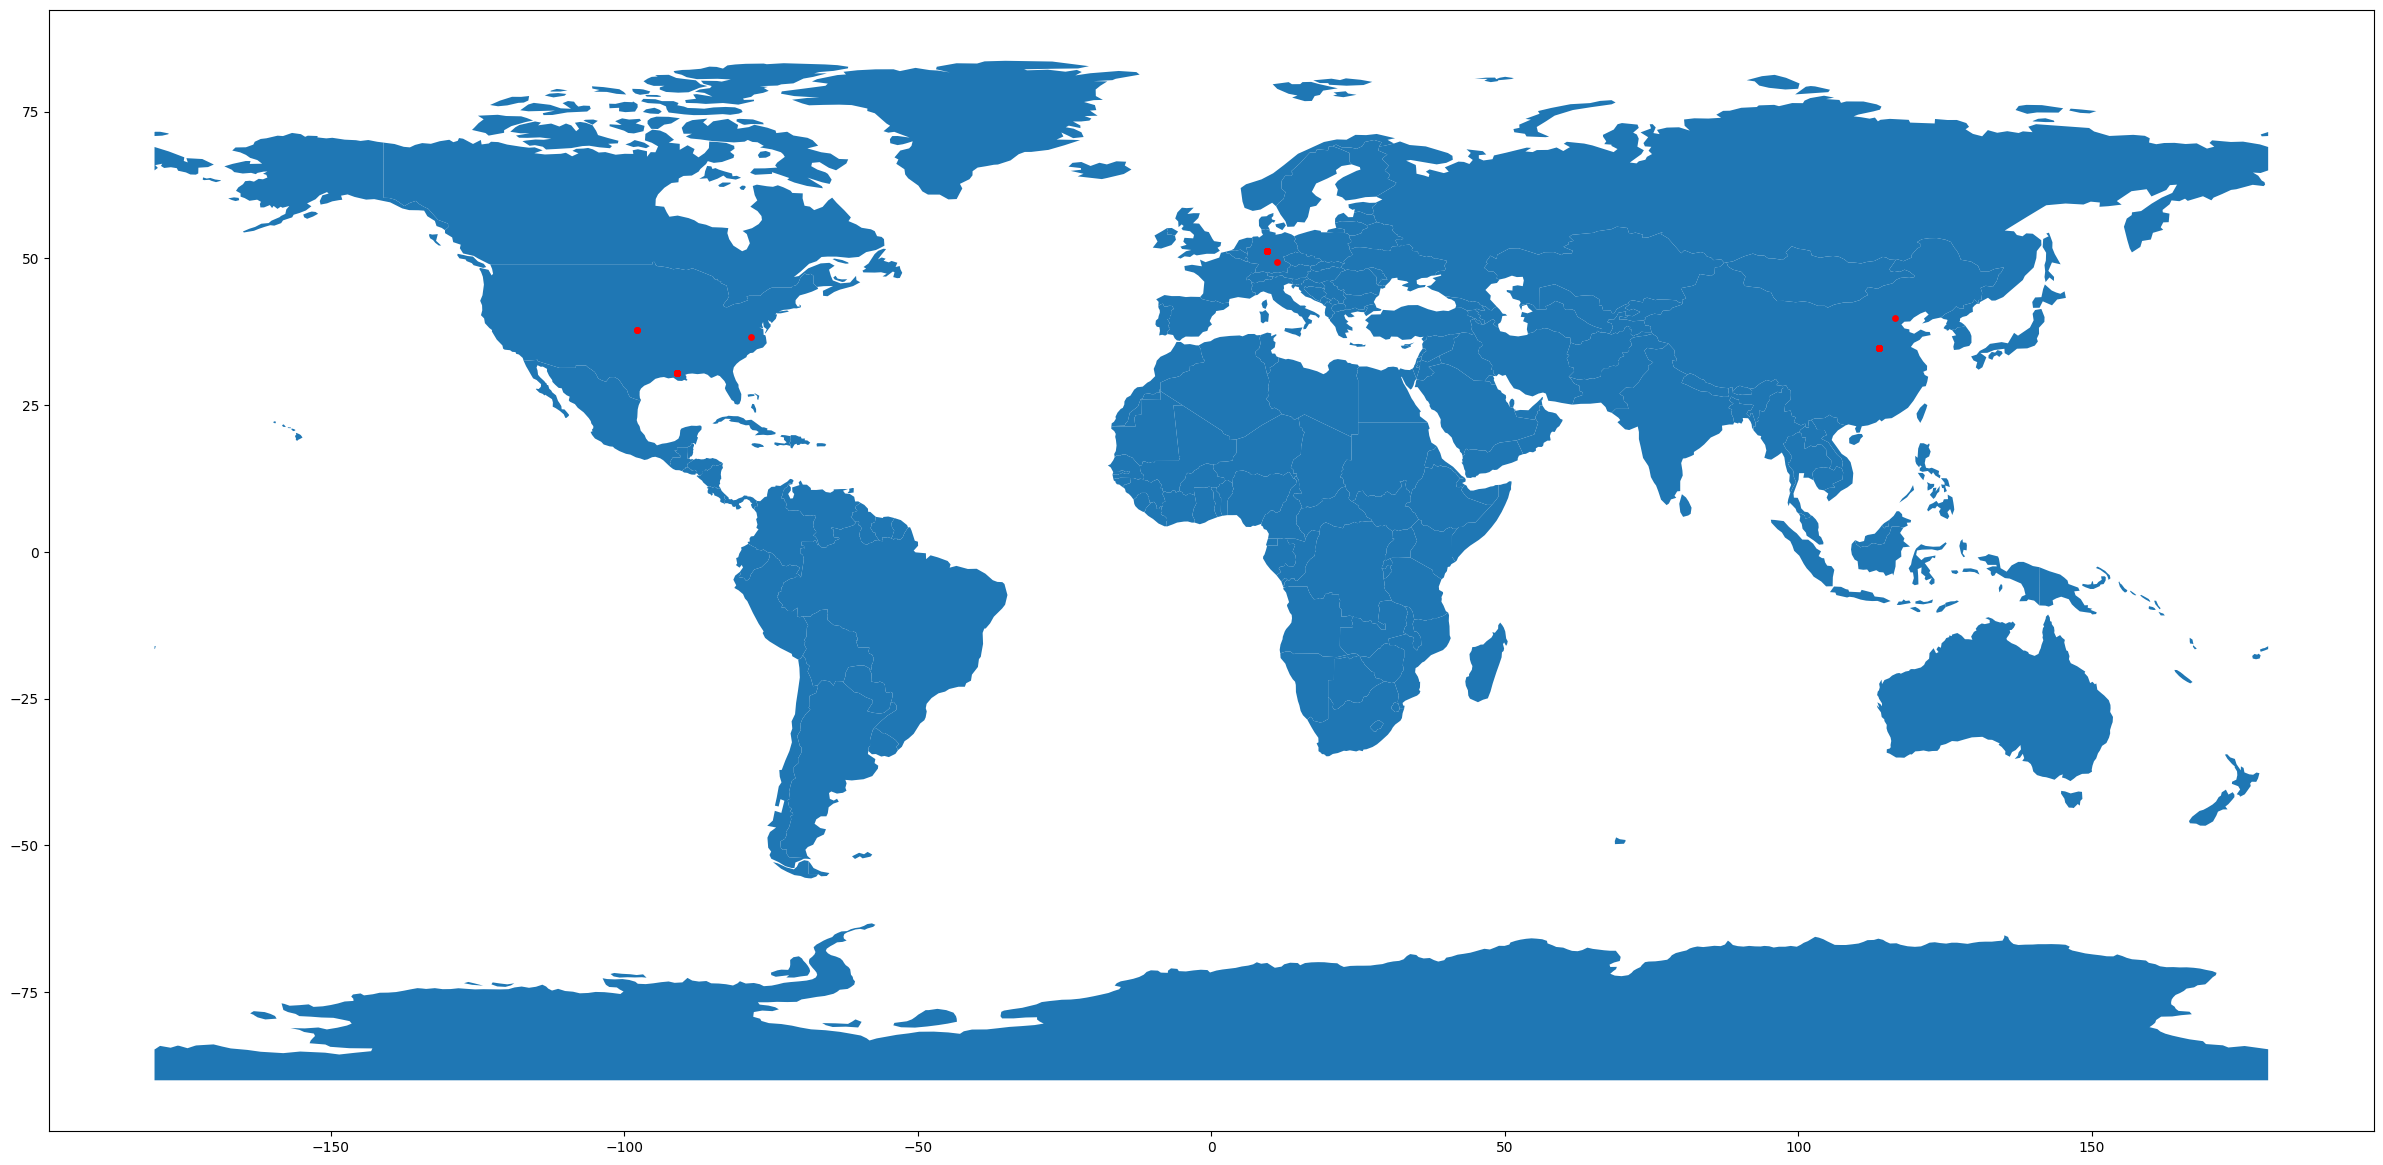

In [ ]:
geometry = [Point(xy) for xy in zip(new_df['longitude'], new_df['latitude'])]
gdf = GeoDataFrame(new_df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(30, 20)), marker='o', color='red', markersize=15)

In [ ]:
import plotly.express as px
import pandas as pd





#color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(new_df, 
                        lat="latitude", 
                        lon="longitude", 
                        zoom=8, 
                        height=800,
                        width=800,)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
#https://realpython.com/python-folium-web-maps-from-data/

In [ ]:
#https://www.youtube.com/watch?v=g4rY-dGkBw8

In [ ]:
import folium 

m=folium.Map(location=[30,10], tiles='OpenStreetMap', zoom_start=2)

In [ ]:
def geo_df_to_timestamped_geojson(geo_df, colour="blue", marker_type="LineString"):
   df = geo_df.copy()
   x_coords = df["geometry"].x.to_list()
   y_coords = df["geometry"].y.to_list()
   coordinate_list = [[x, y] for x, y in zip(x_coords, y_coords)]
   times_list = [i.isoformat() for i in df["timestamp"].to_list()]

   feature_list = [
       {
           "type": "Feature",
           "geometry": {
               "type": marker_type,
               "coordinates": coordinate_list,
           },
           "properties": {
               "times": times_list,
               "style": {
                   "color": colour,
                   "weight": 3,
               },
           },
       }
   ]

   return feature_list

In [ ]:
import folium 

m=folium.Map(location=[30,10], tiles='OpenStreetMap', zoom_start=2)

for i in range (0,len(new_df)):
  folium.Marker(location=[new_df.iloc[i]['latitude'], new_df.iloc[i]['longitude']],
                icon=folium.Icon(color="red"),
                popup= new_df.iloc[i]['timestamp']
                ).add_to(m)
                
  """folium.Marker(location=[new_df.iloc[i]['latitude']+10, new_df.iloc[i]['longitude']+2],
                      icon=folium.DivIcon(
                      icon_size=(150, 36),
                      icon_anchor=(7, 20),
                      html=f'<div style="font-size: 12pt;">{i}</div>'
   )).add_to(m)
              

  """              
                

In [ ]:
####
"""political_countries_url = (

    "http://geojson.xyz/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"

)
folium.GeoJson(political_countries_url).add_to(m)"""
#folium.Choropleth(geo_data=political_countries_url,fill_color="RdYlGn_r").add_to(m)

In [ ]:
m

In [ ]:

df = pd.read_csv("/content/dataset_big.csv", index_col=[0],low_memory=False)

In [ ]:
new_df=df[['timestamp','ip','latitude','longitude']]

In [ ]:
type(new_df.loc[0,'timestamp'])

str

In [ ]:
new_df.loc[0,'timestamp']

'2023-04-11 13:28:26.742530'

In [ ]:
"""new_df['timestamp']=new_df['timestamp'].str[17:19]"""

<ipython-input-93-a4d612ab5b39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['timestamp']=new_df['timestamp'].str[17:19]


In [ ]:
new_df['timestamp']=pd.to_datetime(new_df['timestamp'])

<ipython-input-247-542eb1a0adf0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
type(new_df.loc[0,'timestamp'])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
new_df.columns

Index(['timestamp', 'ip', 'latitude', 'longitude'], dtype='object')

In [ ]:
new_df['timestamp']

0     2023-04-11 13:28:26.742530
1     2023-04-11 13:28:27.259762
2     2023-04-11 13:28:27.951184
3     2023-04-11 13:28:28.451390
4     2023-04-11 13:28:28.939670
                 ...            
151   2023-04-11 13:29:41.074149
152   2023-04-11 13:29:41.596497
153   2023-04-11 13:29:42.066665
154   2023-04-11 13:29:42.589419
155   2023-04-11 13:29:43.215169
Name: timestamp, Length: 156, dtype: datetime64[ns]

In [ ]:
def geo_df_to_timestamped_geojson(geo_df, colour="blue"):
   df = geo_df.copy()
   x_coords = df["longitude"].to_list()
   y_coords = df["latitude"].to_list()
   coordinate_list = [[x, y] for x, y in zip(x_coords, y_coords)]
   times_list = [i.isoformat() for i in df["timestamp"].to_list()]

   feature_list = [
       {
           "type": "Feature",
           "geometry": {
               "type": "MultiPoint",
               "coordinates": coordinate_list,
           },
           "properties": {
               "times": times_list,
                'popup':"we will decide",
                 
                'icon': 'Marker', 
               "style": {
                   "color": colour,
                   "weight": 5,
               },
           },
       }
   ]

   return feature_list

In [ ]:
start_geojson=geo_df_to_timestamped_geojson(new_df)
#start_geojson[0]

In [ ]:
"""def create_geojson_features(df):
    features = []
    
    for _, row in df.iterrows():
        feature = {
            'type': 'Feature',
            'geometry': {
                'type':'Point', 
                'coordinates':[row['longitude'],row['latitude']]
            },
            'properties': {
                'times': row['timestamp']isoformat() 
                }
        }    
        features.append(feature)
    return features
"""

In [ ]:
"""start_geojson= create_geojson_features(new_df)
start_geojson[0]"""

{'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [8.630393, 50.099209]},
 'properties': {'times': Timestamp('2023-04-11 13:28:26.742530')}}

In [ ]:
from folium.plugins import TimestampedGeoJson
import folium 

nyc_map = folium.Map(location=[30,10], tiles='OpenStreetMap', zoom_start=2)

TimestampedGeoJson(start_geojson,
                  period = 'PT1H',
                  duration = 'P1D',
                  transition_time = 1500,
                  add_last_point=True,
                  loop=True,
                  auto_play = True).add_to(nyc_map)






"""TimestampedGeoJson(start_geojson
        , period='PT1H'
        , duration='PT1H'
        , auto_play=True
        , loop=True
        , max_speed=2
        , loop_button=True

         ,transition_time = 1500
        , date_options='YYYY/MM/DD HH:mm:ss'
        , time_slider_drag_update=False
    ).add_to(nyc_map)

  """

"TimestampedGeoJson(start_geojson\n        , period='PT1H'\n        , duration='PT1H'\n        , auto_play=True\n        , loop=True\n        , max_speed=2\n        , loop_button=True\n\n         ,transition_time = 1500\n        , date_options='YYYY/MM/DD HH:mm:ss'\n        , time_slider_drag_update=False\n    ).add_to(nyc_map)\n\n  "

In [ ]:
nyc_map